# Lab 5 - Neural Networks

In this lab we will use a pre-trained neural network that is designed for image classification. We will show you a number of different visualization options and allow you to play around with them yourself to gain a greater understanding.
Likewise, we will show you how LIME is used for images as well.

You are then tasked to use the techniques on another model to try and explain how it is working, and to investigate if there is any wrong doings in its predictions. Remember to also look into the dataset!

## Setup

### Package Installation
tf-keras-vis was not included in the installation part of lab 1, it needs to be installed here.

**Remember to restart the session! Otherwise you will end up with erroneous imports later on.**

In [1]:
!pip install -U tensorflow==2.15.1 lime==0.2.0.1 tf-keras-vis==0.8.6 numpy==1.26.4 pandas==2.0.3

  Obtaining dependency information for tensorflow==2.15.1 from https://files.pythonhosted.org/packages/f1/31/3191cd83da2f213a3c4af5e40597a98996e9c84b56666f9595dad8a6e780/tensorflow-2.15.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for pandas==2.0.3 from https://files.pythonhosted.org/packages/8f/bb/aea1fbeed5b474cb8634364718abe9030d7cc7a30bf51f40bd494bbc89a2/pandas-2.0.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for wrapt<1.15,>=1.11.0 from https://files.pythonhosted.org/packages/6e/79/aec8185eefe20e8f49e5adeb0c2e20e016d5916d10872c17705ddac41be2/wrapt-1.14.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for tensorboard<2.16,>=2.15 from https://files.pythonhosted.org/packages/37/12/f6e9b9dcc310263cbd3948274e286538bd6800fd0c268850788f14a0c6d0/tensorboard-2.15.2-py3-none-any.whl.metadata
  Obtaining dependency information for tensorflow-estimator<2.16,>=2.15.0 from https://files.pythonho

### Package import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as c_map
import matplotlib
from IPython.display import Image, display
import tensorflow as tf
from tensorflow import keras
import os
import PIL
#import os
#os.environ["TF_USE_LEGACY_KERAS"] = "1"

from tensorflow.keras.applications.vgg16 import VGG16 as Model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input


from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency

### Intializations and loading data

The easiest approach to using the data for the lab, is to download the data folder (lab5_data) from the lab assignment page on blackboard. Reupload them to your root folder on your google drive. The cell below mounts your google drive to reach those uploaded files later. If you choose to do something else, you are free to do so but remember to update the file paths.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
GDRIVE = 'drive/MyDrive'
FOLDER = 'lab5_data'

basepath = os.path.join(GDRIVE, FOLDER)

!ls $basepath

## Neural Network Image Activation visualizations

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

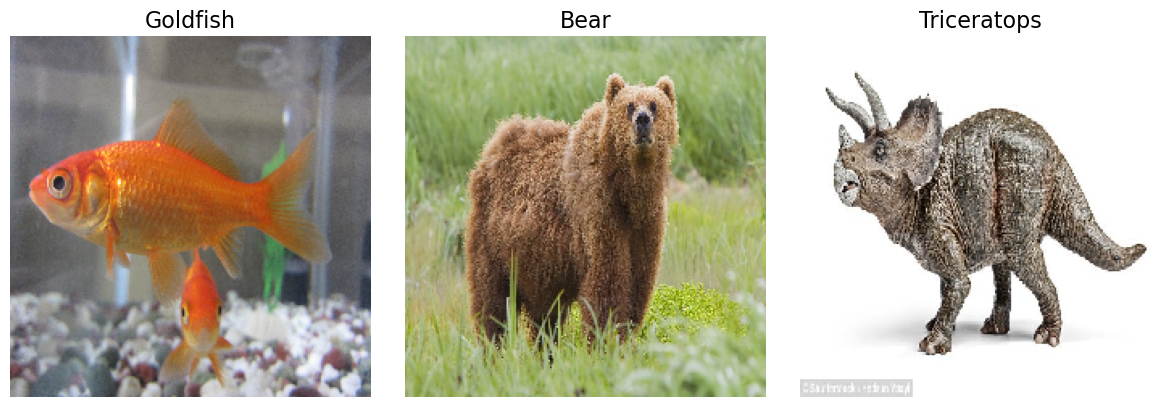

In [4]:
model = Model(weights='imagenet', include_top=True)
model.summary()

# Image titles
image_titles = ['Goldfish', 'Bear', 'Triceratops']
#GDRIVE_DIR = '/content/gdrive'

# Load images and Convert them to a Numpy array
#img1 = load_img(os.path.join(basepath, 'goldfish.jpg'), target_size=(224, 224))
#img2 = load_img(os.path.join(basepath, 'bear.jpg'), target_size=(224, 224))
#img3 = load_img(os.path.join(basepath, 'triceratops.jpg'), target_size=(224, 224))
img1 = load_img('goldfish.JPG', target_size=(224, 224))
img2 = load_img('bear.jpg', target_size=(224, 224))
img3 = load_img('triceratops.jpg', target_size=(224, 224))
images = np.asarray([np.array(img1), np.array(img2), np.array(img3)])

# Preparing input data for VGG16
X = preprocess_input(images)

# Rendering
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [34]:
!pip install keras==3.3.3
!pip install tensorflow==2.16.1

  Obtaining dependency information for tensorflow==2.16.1 from https://files.pythonhosted.org/packages/f9/14/67e9b2b2379cb530c0412123a674d045eca387dfcfa7db1c0028857b0a66/tensorflow-2.16.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached tensorflow-2.16.1-cp311-cp311-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Obtaining dependency information for tensorboard<2.17,>=2.16 from https://files.pythonhosted.org/packages/3a/d0/b97889ffa769e2d1fdebb632084d5e8b53fc299d43a537acee7ec0c021a3/tensorboard-2.16.2-py3-none-any.whl.metadata
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
Using cached tensorflow-2.16.1-cp311-cp311-macosx_12_0_arm64.whl (227.0 MB)
Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.13.0
    Uninstalling tensorboard-2.13.0:
      Successfully uninstalled tensorboard-2.13.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.13.0r

In [35]:
!pip install tf-keras-vis tensorflow

Boilerplate code for the tf-Keras-vis package.

In [19]:
#from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

def score_function(output):
    # This version returns the result for the corresponding class from the
    # prediction of each image we are to show.
    # output[x][y] -> x = which image, y = which class in the imagenet labels
    return (output[0][1], output[1][294], output[2][51])

# Alters the softmax output to a linear output
#replace2linear = ReplaceToLinear() 
#Got incompatibility errors, so instead:

def model_modifier_function(cloned_model):
    cloned_model.layers[-1].activation = tf.keras.activations.linear


# The actual labels to each category that we investigate, i.e. the goldfish,
# bear, and triceratops label indices.
score = CategoricalScore([1, 294, 51])

Saliency map

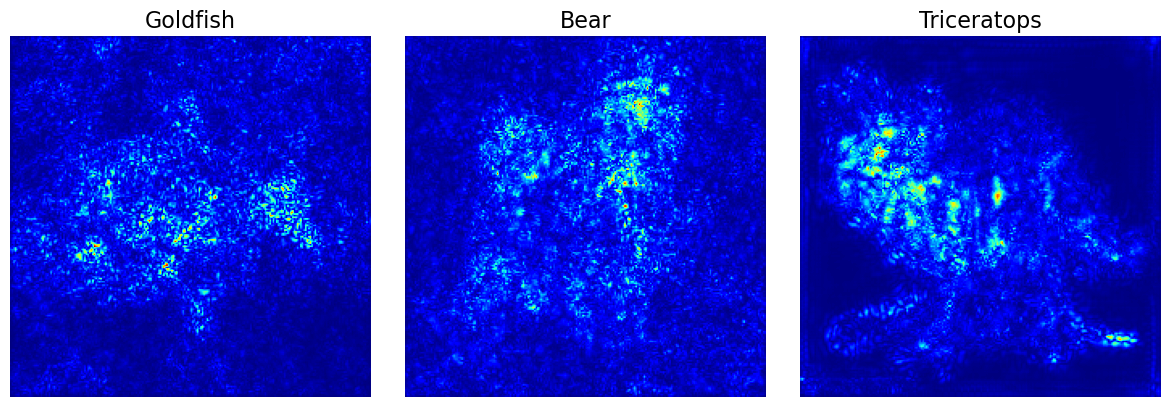

In [13]:
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency

# Create Saliency object (replace to linear)
#saliency = Saliency(model,
                    #model_modifier=replace2linear,
                    #clone=True)


# Create Saliency object, defined from scratch, solution found here https://keisen.github.io/tf-keras-vis-docs/examples/attentions.html
saliency = Saliency(model,
                    model_modifier=model_modifier_function,
                    clone=True)

# Generate saliency map
saliency_map = saliency(score, X)

# Render
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(saliency_map[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

Smooth Saliency map.

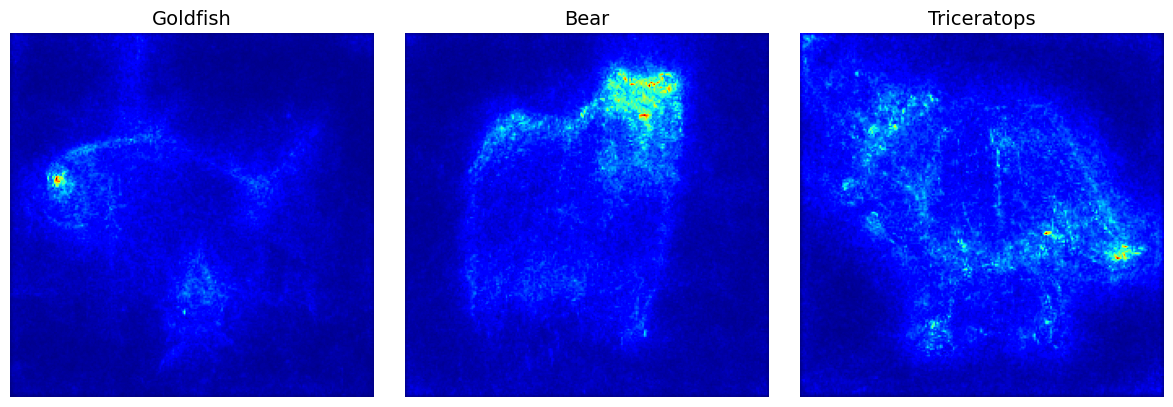

In [14]:
# Generate saliency map with smoothing that reduce noise by adding noise
saliency = Saliency(model,
                    model_modifier=model_modifier_function,
                    clone=True)

saliency_map = saliency(score,
                        X,
                        smooth_samples=20, # The number of calculating gradients iterations.
                        smooth_noise=0.20) # noise spread level.

# Render
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(saliency_map[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

GRAD-Cam

In [69]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

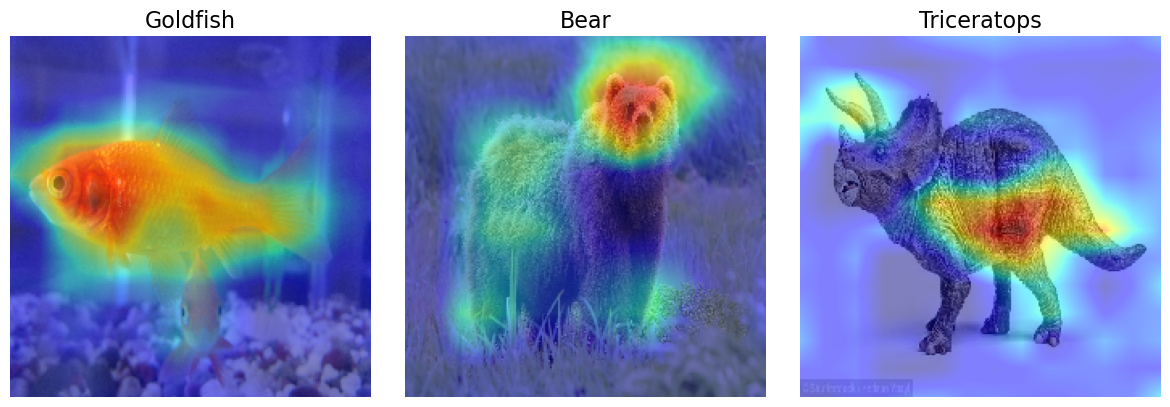

In [72]:
from matplotlib import cm
from tensorflow.python.keras.layers.convolutional import Conv

from tf_keras_vis.gradcam import Gradcam

# Create Gradcam object
gradcam = Gradcam(model,
                  model_modifier=model_modifier_function,
                  clone=True)

# Generate heatmap with GradCAM
cam = gradcam(score,
              X,
              seek_penultimate_conv_layer=False, #added because could not locate penultimate conv layer, seehttps://insights.willogy.io/tensorflow-insights-part-5-custom-model-vgg-continue/
              penultimate_layer="block5_conv3") #determined the layer by choosing the last block from model.summary() above

# Render
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5) # overlay
    ax[i].axis('off')
plt.tight_layout()
plt.show()

GRAD-CAM++

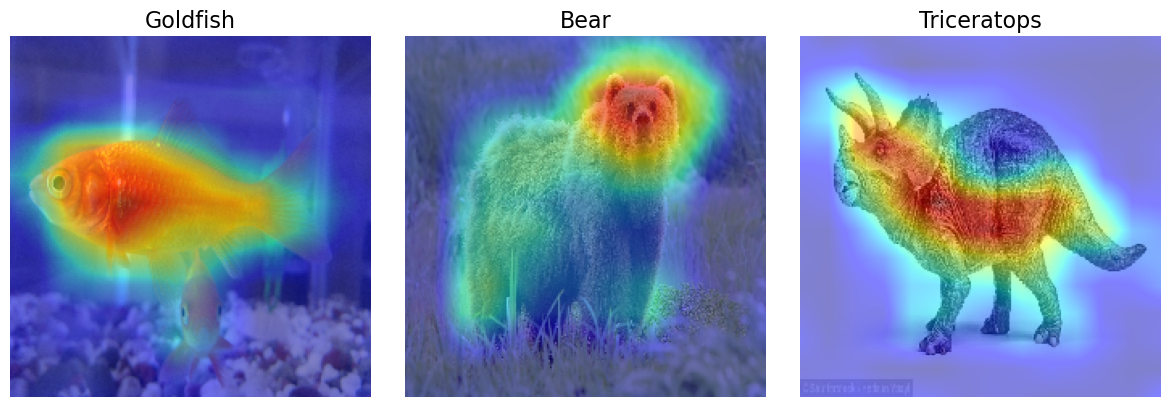

In [74]:
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus

# Create GradCAM++ object
gradcam = GradcamPlusPlus(model,
                          model_modifier=model_modifier_function,
                          clone=True)

# Generate heatmap with GradCAM++
cam = gradcam(score,
              X,
              seek_penultimate_conv_layer=False, #added because could not locate penultimate conv layer, see https://insights.willogy.io/tensorflow-insights-part-5-custom-model-vgg-continue/
              penultimate_layer="block5_conv3")

# Render
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

(Faster) ScoreCAM

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step


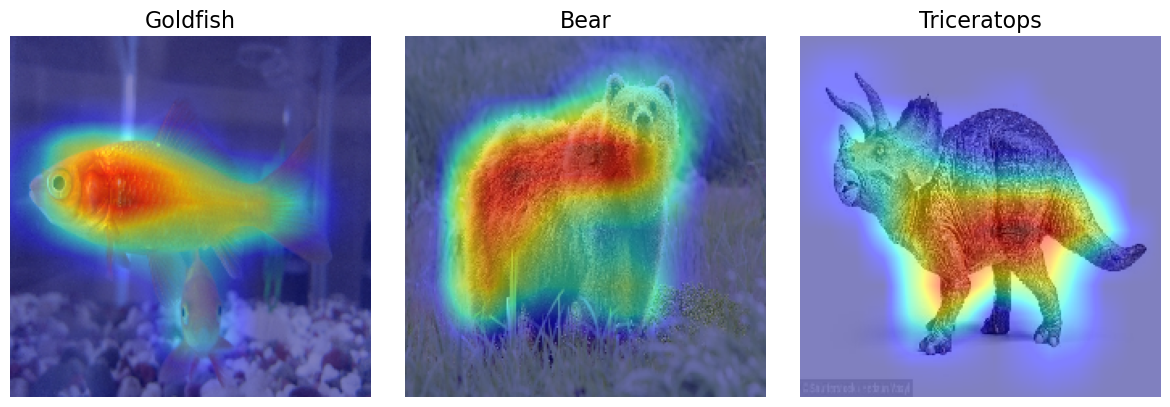

In [76]:
# Fast ScoreCAM
from tf_keras_vis.scorecam import Scorecam

# Create ScoreCAM object
scorecam = Scorecam(model, model_modifier=model_modifier_function)

# Generate heatmap with Faster-ScoreCAM
cam = scorecam(score,
               X,
               seek_penultimate_conv_layer=False, #added because could not locate penultimate conv layer, see https://insights.willogy.io/tensorflow-insights-part-5-custom-model-vgg-continue/
               penultimate_layer="block5_conv3",
               max_N=10)

# Render
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

These visualization techniques try to highlight which pixels provide the most importance to the prediction of the image.

What's you view of the techniques? Are they useful?

#i listened to a podcast recently by molnar saying that saliency maps work like edge detectors and can be misleading.
#I think they can be useful, in conjunction with other techniques, if they actually do what they set out to. For the images above which are rather simple, the saliency maps point to that the dnn is not working perfectly well, for example I would expect it to discern the triceratops by the horns, that is to say, horns should be able to change the output of the model.

## Neural Network Layer Dissections/visualizations
We change the scoring from before to work in this context. The following score, when used, returns the value from the 3rd filter in the **block5_conv3** layer.

In [129]:
from tf_keras_vis.utils.model_modifiers import ExtractIntermediateLayer, ReplaceToLinear

filter_number = 3
score = CategoricalScore(filter_number)

In [130]:
def model_modifier_function(current_model):
    target_layer = current_model.get_layer(name=layer_name)
    target_layer.activation = tf.keras.activations.linear
    new_model = tf.keras.Model(inputs=current_model.inputs,
                               outputs=target_layer.output)
    return new_model

Create an activation maximum instance

In [131]:
from tf_keras_vis.activation_maximization import ActivationMaximization
activation_maximization = ActivationMaximization(model,
                                                 model_modifier=[ExtractIntermediateLayer('block5_conv3'), ReplaceToLinear()],
                                                 clone=False)

In [132]:
from tf_keras_vis.activation_maximization.input_modifiers import Jitter, Rotate2D
from tf_keras_vis.activation_maximization.regularizers import TotalVariation2D, Norm

Visualizes the 63rd convolutional layer. This takes a while to run, so if you're in a hurry you can skip it for now.

In [133]:
from tf_keras_vis.activation_maximization.callbacks import Progress

FILTER_INDEX = 3

activations = \
   activation_maximization(CategoricalScore(FILTER_INDEX),
                           steps=200,
                           input_modifiers=[Jitter(jitter=16), Rotate2D(degree=1)],
                           regularizers=[TotalVariation2D(weight=1.0),
                                         Norm(weight=0.3, p=1)],
                           optimizer=tf.keras.optimizers.RMSprop(1.0, 0.999),
                           callbacks=[Progress()])
# Generate maximized activation
activations = activation_maximization(score,
                                      callbacks=[Progress()])


200/200 ━━━━━━━━━━━━━━━━━━━━ 74s 368ms/step - Score: 332.6150 - TotalVariation2D: 10.5225 - Norm: 38.4288
200/200 ━━━━━━━━━━━━━━━━━━━━ 73s 365ms/step - Score: 388.9644 - TotalVariation2D: 10.2118 - Norm: 38.4219


In [ ]:
# I had to upgrade keras, because i was getting Functional object has no attribute inpute_names for the model..
#pip install --upgrade tf-keras-vis

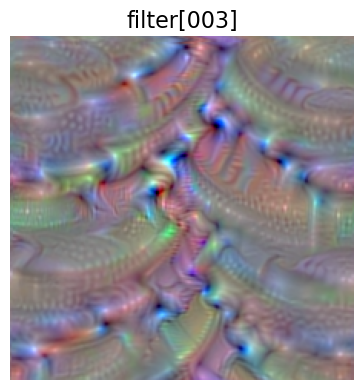

In [134]:
# Render the filter from above
f, ax = plt.subplots(figsize=(4, 4))
ax.imshow(tf.cast(activations[0], np.uint8))
ax.set_title('filter[{:03d}]'.format(filter_number), fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()

These techniques instead tries to visualize the features each layer is seeing from an image. How would you describe the above? Is it useful for you to understand this filter? Can you understand it?

The visualizations produced by analyzing activations in a CNN may appear as abstract patterns or "gibberish" to humans. These visualizations are not directly interpretable in the way that humans interpret images. Instead, they represent the patterns or features that specific filters in the network are sensitive to.

While the individual visualizations may not be directly interpretable, analyzing them can provide insights into what types of features the network is learning to detect. For example, you may observe that certain filters consistently respond to textures, while others respond to edges or object parts.


## LIME
The LIME library also works well on images, to see where the model puts its interest in the images it predicts upon.


In [139]:
import lime
from lime import lime_image

# creating the explainer object
explainer = lime_image.LimeImageExplainer()

# You can view each individual image we have looked at before by
# changing the index in the images[] variable below.
explanation = explainer.explain_instance(images[2], model.predict
                                         , top_labels=5,
                                         hide_color=0, num_samples=1000)



  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

It is important that you run a large amount of samples, otherwise you could get misleading results. Try and lower the num_samples substantially above and see what happens.

You can visualize with both the image as the background

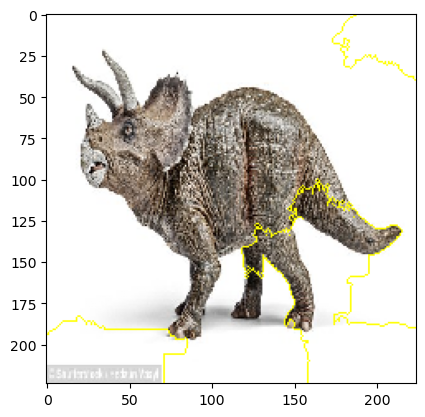

In [151]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

Or just the mask itself.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


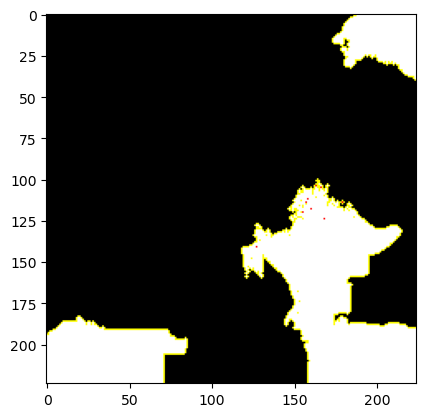

In [152]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))

In [153]:
import lime
from lime import lime_image

# creating the explainer object
explainer = lime_image.LimeImageExplainer()

# You can view each individual image we have looked at before by
# changing the index in the images[] variable below.
explanation = explainer.explain_instance(images[2], model.predict
                                         , top_labels=5,
                                         hide_color=0, num_samples=100)

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


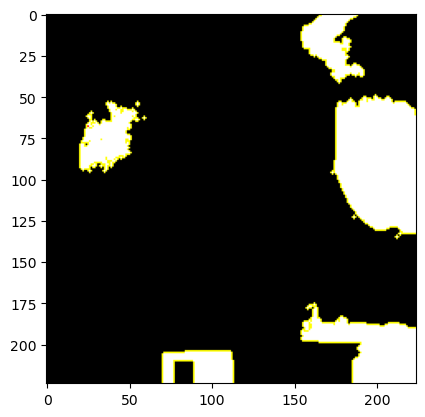

In [155]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))

In [ ]:
#both cases, horrible boundaries.

# Assignment
In your assignment, you are to use the given blackbox model on a dataset and explore if you can identify what the model has actually learned. The dataset is based on the Dogs and Wolves dataset from [Kaggle](https://www.kaggle.com/datasets/harishvutukuri/dogs-vs-wolves?resource=download). It has been significantly reduced and picked out images to only contain huskies and wolves. Some additional images have been added manually.

Investigate the model using **some** of the techniques shown from **tf-keras-vis** and using the **LIME** library and try to explain what the model have actually learned. Using tf-keras-vis and its visualizations might require you to improve your tensorflow/keras skills, here is their website for guidande and examples if needed [website](https://keisen.github.io/tf-keras-vis-docs/index.html)

Look into which images are correctly classified in the validation set and which aren't. Visualize which parts of the images that are of importance for the model.

What conclusions can you draw?

What does the model really look for in the images?

Show your steps, explain them, and reflect upon your results in cells below.

You will find an example of how you can use and visualize the Saliency Maps on this dataset and model. Adapt accordingly for the remainder of the techniques.


# Assignment

## Black box training
Training the model to be analyzed by the students.

In [160]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import sys
import matplotlib.pyplot as plt
import numpy as np

basepath = "/Users/rena/Desktop/halmstad/explainable ai/labs/lab 5"
training_path = os.path.join(basepath, 'husky_wolves/training/')
validation_path = os.path.join(basepath, 'husky_wolves/validation/')

image_gen = ImageDataGenerator(rescale=1./255)
train_generator = image_gen.flow_from_directory(directory=training_path,
                                                target_size=(256,256),
                                                batch_size=20,
                                                shuffle=True,
                                                seed=101)

Found 76 images belonging to 2 classes.


In [161]:
def get_model(input_shape):
    """
    This function should build and compile a CNN model according to the above specification,
    using the functional API. Your function should return the model.
    """
    input_layer = Input(input_shape)
    h = Conv2D(filters=8, kernel_size=(8,8), padding='SAME', activation='relu')(input_layer)
    h = MaxPool2D((2,2))(h)
    h = Conv2D(4, (4,4), padding='SAME', activation='relu')(h)
    h = MaxPool2D((2,2))(h)
    Flatten_layer = Flatten()(h)
    h = Dense(16, activation='relu')(Flatten_layer)
    output_layer = Dense(2, activation='softmax')(h)
    model = Model(inputs= input_layer, outputs = output_layer)
    opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
    model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics = [tf.keras.metrics.CategoricalAccuracy(name='accuracy')])
    return model

model = get_model((256, 256, 3))
model.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 8)    │         1,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 4)    │           516 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │       262,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,254 (1.01 MB)

 Trainable params: 264,254 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

In [162]:
model.fit(train_generator, epochs=10)

Epoch 1/10


/Users/rena/anaconda3/envs/explainableai/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 455ms/step - accuracy: 0.3721 - loss: 0.8467
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 453ms/step - accuracy: 0.5177 - loss: 0.6980
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 452ms/step - accuracy: 0.5811 - loss: 0.6930
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 453ms/step - accuracy: 0.6058 - loss: 0.6930
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 452ms/step - accuracy: 0.5498 - loss: 0.6930
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 451ms/step - accuracy: 0.5491 - loss: 0.6930
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 451ms/step - accuracy: 0.5114 - loss: 0.6930
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 451ms/step - accuracy: 0.5905 - loss: 0.6928
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 452ms/step - accuracy: 0.5679 - loss: 0.6928
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 452ms/step - accuracy: 0.5312 - loss: 0.6926


## Loading validation data, for you to use.

In [163]:
images = np.asarray([load_img(os.path.join(validation_path, 'husky', 'husky_validation_{0}.jpg'.format(x)), target_size=(256,256)) for x in range(1,9)] + [load_img(os.path.join(validation_path, 'wolf', 'wolf_validation_{0}.jpg'.format(x)), target_size=(256,256)) for x in range(1,9)])
labels = np.array([0 for x in range(8)] + [1 for x in range(8)])
class_names = ['husky', 'wolf']
images = images/255

In [164]:
count = 0
i = 0
predictions = model.predict(images)
for i in range(len(labels)):
  if np.argmax(predictions[i]) == labels[i]:
    count += 1
print('validation accuracy %.3f'%(count/len(labels)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
validation accuracy 0.500


## Visualizing validation data

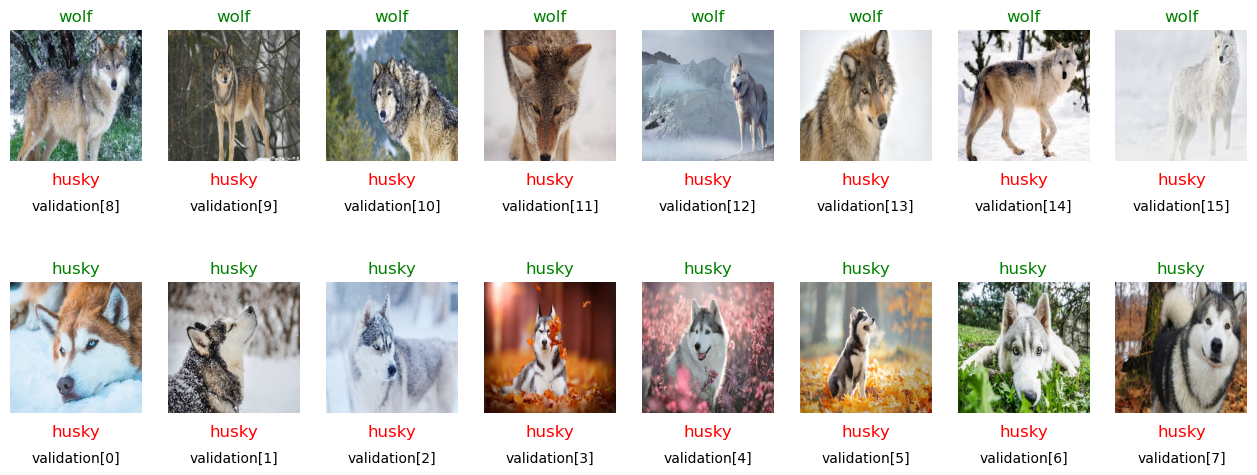

In [165]:
j = 1
k = 10
plt.figure(figsize=(18,6))
for i in range(16):
  if labels[i] == 0:
    ax = plt.subplot(2,9,k)
    k += 1
  else:
    ax = plt.subplot(2,9,j)
    j+=1

  plt.imshow((images[i]*255).astype('uint8'))
  plt.title(class_names[labels[i]], color='green')
  plt.text(128,300, class_names[np.argmax(predictions[i])], color='red', fontsize='large', horizontalalignment='center')
  plt.text(128,350, 'validation[{0}]'.format(i), horizontalalignment='center')
  plt.axis('off')


## Visualizing saliency maps

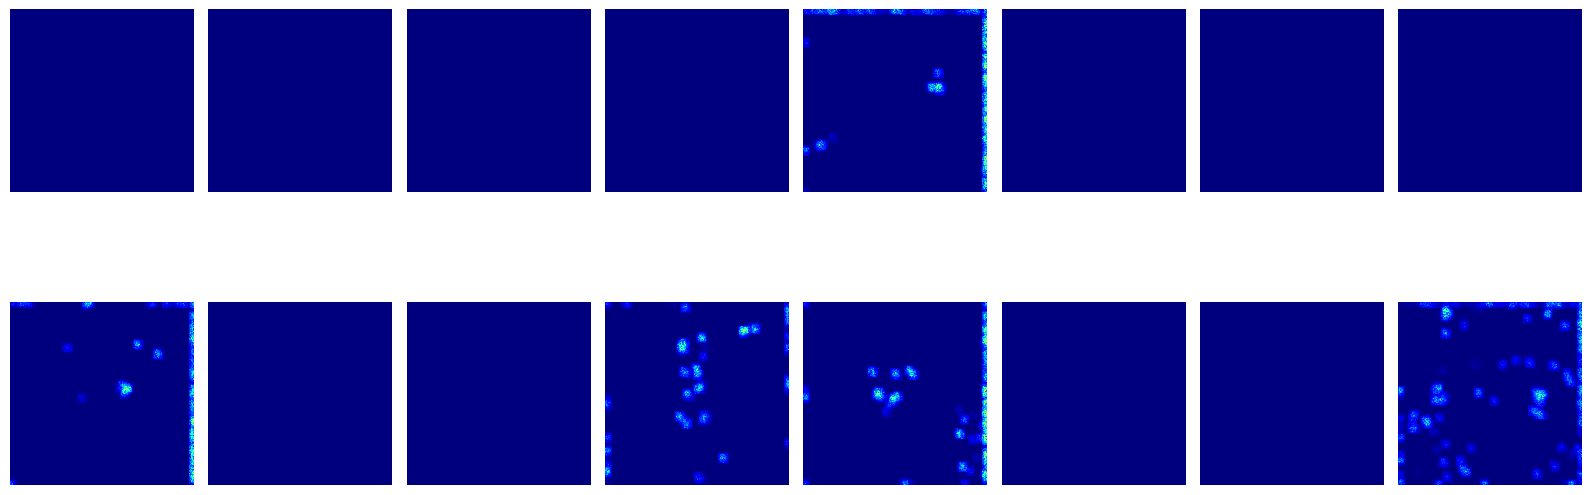

In [166]:
# Generate saliency map with smoothing that reduce noise by adding noise

score = CategoricalScore([0]*8+[1]*8)

saliency = Saliency(model,
                    model_modifier=replace2linear,
                    clone=True)

saliency_map = saliency(score,
                        images)#,
                        #smooth_samples=20, # The number of calculating gradients iterations.
                        #smooth_noise=0.20) # noise spread level.

# Render
j = 1
k = 10
plt.figure(figsize=(18,6))
for i in range(16):
  if labels[i] == 0:
    ax = plt.subplot(2,9,k)
    k += 1
  else:
    ax = plt.subplot(2,9,j)
    j+=1
    #ax[i].set_title(title, fontsize=14)
  plt.imshow(saliency_map[i], cmap='jet')
  plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Student code and text..

In [191]:
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Input, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Define the basepath to the dataset
basepath = "/Users/rena/Desktop/halmstad/explainable ai/labs/lab 5"

# Define paths to training and validation data
training_path = os.path.join(basepath, 'husky_wolves/training/')
validation_path = os.path.join(basepath, 'husky_wolves/validation/')

#### ImageDataGenerator for data augmentation and preprocessing
image_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=20,  # Rotation range for data augmentation
                               width_shift_range=0.2,  # Width shift range for data augmentation
                               height_shift_range=0.2,  # Height shift range for data augmentation
                               shear_range=0.2,  # Shear range for data augmentation
                               zoom_range=0.2,  # Zoom range for data augmentation
                               horizontal_flip=True)  # Horizontal flipping for data augmentation


train_generator = image_gen.flow_from_directory(directory=training_path,
                                                target_size=(256,256),
                                                batch_size=20,
                                                shuffle=True,
                                                seed=101)

# Improved model architecture
def get_improved_model(input_shape):
    input_layer = Input(input_shape)
    h = Conv2D(filters=16, kernel_size=(3,3), padding='SAME', activation='relu')(input_layer)
    h = MaxPool2D((2,2))(h)
    h = Conv2D(32, (3,3), padding='SAME', activation='relu')(h)
    h = MaxPool2D((2,2))(h)
    h = Conv2D(64, (3,3), padding='SAME', activation='relu')(h)
    h = MaxPool2D((2,2))(h)
    h = Flatten()(h)
    h = Dense(128, activation='relu')(h)
    #### Improved model architecture with dropout regularization
    h = Dropout(0.5)(h)  # Adding dropout with a dropout rate of 0.5 for regularization

    output_layer = Dense(2, activation='softmax')(h)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    #### Adjusted learning rate for the Adam optimizer
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjusted learning rate to 0.001 for better convergence

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Train the improved model
improved_model = get_improved_model((256, 256, 3))
improved_model.summary()
#### Increased the number of training epochs
improved_model.fit(train_generator, epochs=16)  # Increased epochs to 25 for more training



Found 76 images belonging to 2 classes.


Model: "functional_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,412,578 (32.09 MB)

 Trainable params: 8,412,578 (32.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.4639 - loss: 2.6056
Epoch 2/16
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.4969 - loss: 2.2076
Epoch 3/16
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.4631 - loss: 0.7625
Epoch 4/16
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.5362 - loss: 0.6534
Epoch 5/16
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.5850 - loss: 0.6157
Epoch 6/16
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.6955 - loss: 0.6046
Epoch 7/16
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.7605 - loss: 0.4865
Epoch 8/16
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.8361 - loss: 0.4196
Epoch 9/16
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.8154 - loss: 0.3756
Epoch 10/16
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.7467 - loss: 0.4450
Epoch 11/16
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.8037 - loss: 0.3534
Epoch 12/16
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.8916 - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
validation accuracy 0.688


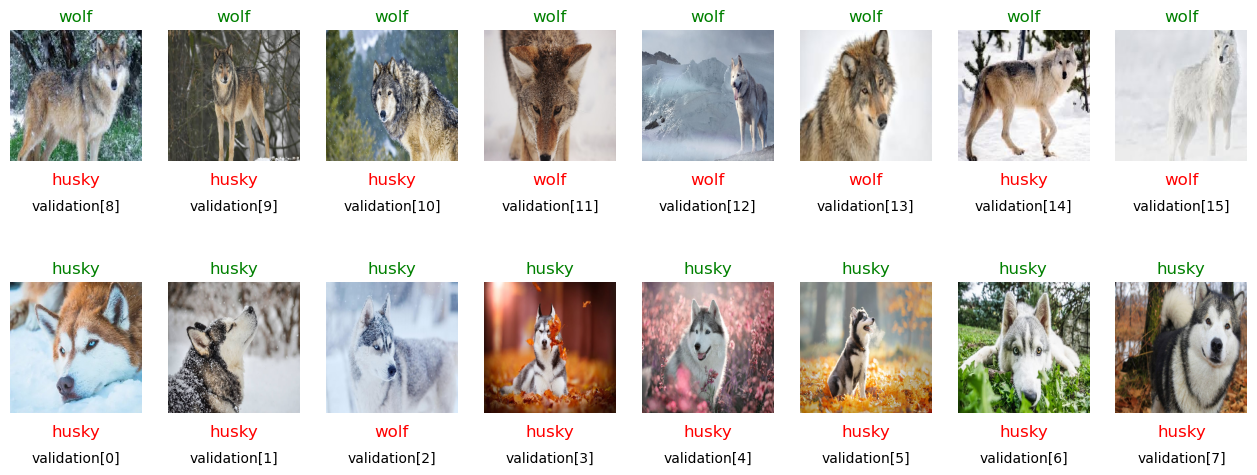

In [192]:
#Now the validation accuracy is 0.688 by making the changes marked #### above. Still pretty bad but it's enough.

count = 0
i = 0
predictions = improved_model.predict(images)
for i in range(len(labels)):
  if np.argmax(predictions[i]) == labels[i]:
    count += 1
print('validation accuracy %.3f'%(count/len(labels)))

images = np.asarray([load_img(os.path.join(validation_path, 'husky', 'husky_validation_{0}.jpg'.format(x)), target_size=(256,256)) for x in range(1,9)] + [load_img(os.path.join(validation_path, 'wolf', 'wolf_validation_{0}.jpg'.format(x)), target_size=(256,256)) for x in range(1,9)])
labels = np.array([0 for x in range(8)] + [1 for x in range(8)])
class_names = ['husky', 'wolf']
images = images/255
j = 1
k = 10
plt.figure(figsize=(18,6))
for i in range(16):
  if labels[i] == 0:
    ax = plt.subplot(2,9,k)
    k += 1
  else:
    ax = plt.subplot(2,9,j)
    j+=1

  plt.imshow((images[i]*255).astype('uint8'))
  plt.title(class_names[labels[i]], color='green')
  plt.text(128,300, class_names[np.argmax(predictions[i])], color='red', fontsize='large', horizontalalignment='center')
  plt.text(128,350, 'validation[{0}]'.format(i), horizontalalignment='center')
  plt.axis('off')


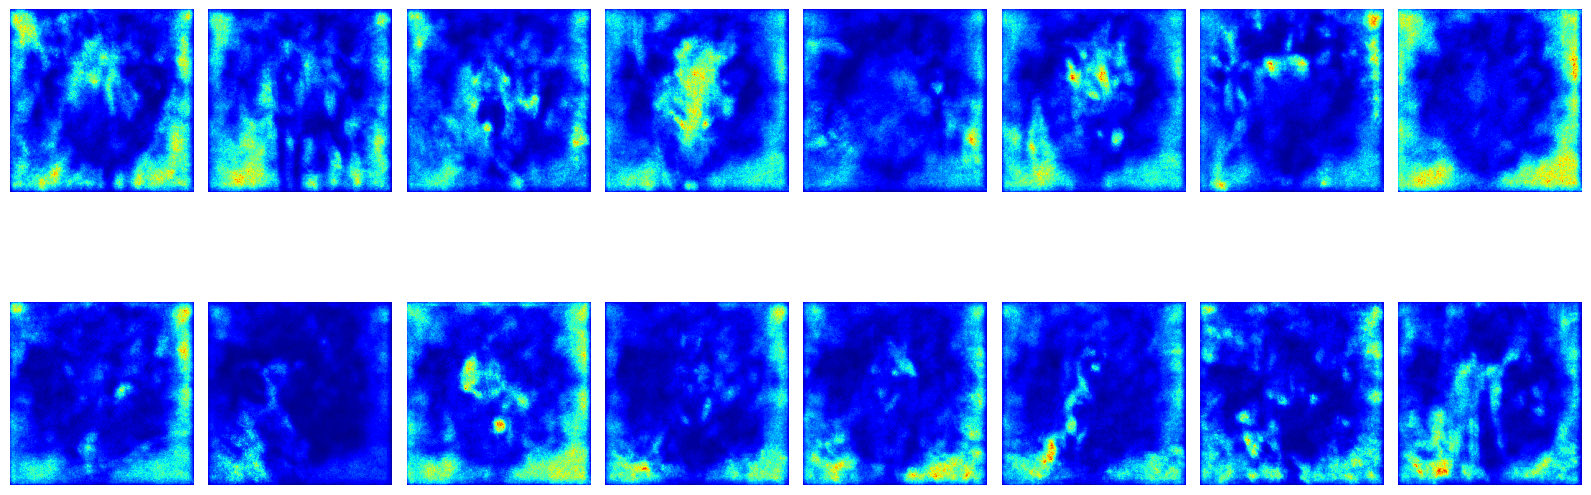

In [202]:
# Generate saliency map with smoothing that reduce noise by adding noise

score = CategoricalScore([0]*8+[1]*8)

saliency = Saliency(improved_model,
                    model_modifier=replace2linear,
                    clone=True)

saliency_map = saliency(score,
                        images,
                        smooth_samples=20, # The number of calculating gradients iterations.
                        smooth_noise=0.20) # noise spread level.

# Render
j = 1
k = 10
plt.figure(figsize=(18,6))
for i in range(16):
  if labels[i] == 0:
    ax = plt.subplot(2,9,k)
    k += 1
  else:
    ax = plt.subplot(2,9,j)
    j+=1
    #ax[i].set_title(title, fontsize=14)
  plt.imshow(saliency_map[i], cmap='jet')
  plt.axis('off')
plt.tight_layout()
plt.show()

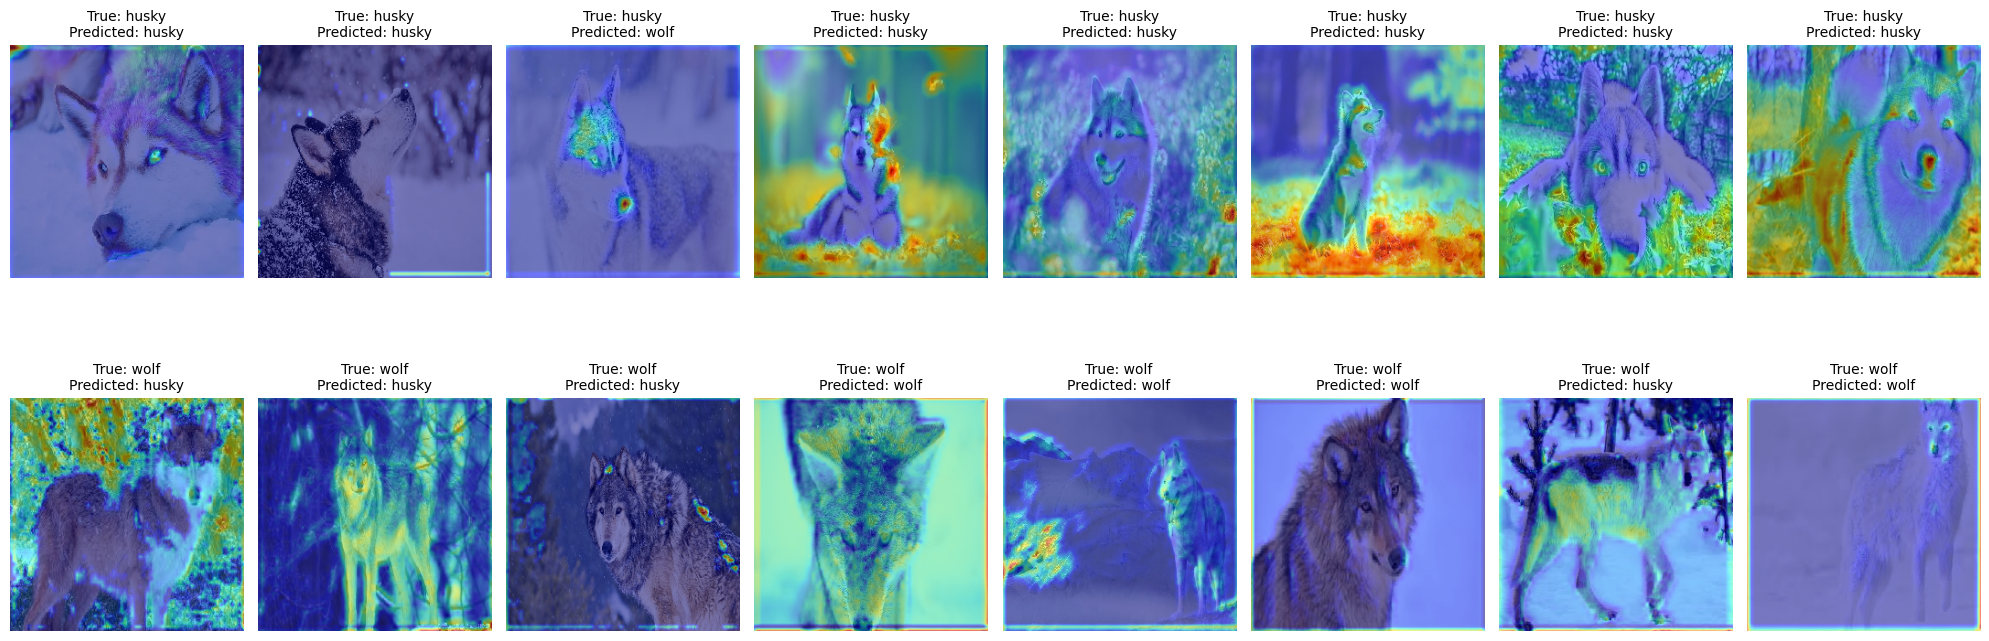

In [201]:
#What conclusions can you draw?

#What does the model really look for in the images?

#It looks like it is looking at the environment to determine if it s a wolf or a husky, see above saliency maps.


from matplotlib import cm
from tensorflow.python.keras.layers.convolutional import Conv
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus

# Create GradCAM++ object
gradcam = GradcamPlusPlus(improved_model,
                          model_modifier=replace2linear,
                          clone=True)

# Generate heatmap with GradCAM++
cam = gradcam(score,
              images,
              penultimate_layer=-1)

# Define the class names
class_names = ['husky', 'wolf']

# Render
f, ax = plt.subplots(nrows=2, ncols=8, figsize=(20, 8))
for i in range(16):
    row = i // 8
    col = i % 8
    
    # Get the corresponding image and heatmap
    image = images[i]
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    
    # Determine the true label and model's predicted label
    true_label = class_names[labels[i]]
    predicted_label = class_names[np.argmax(predictions[i])]
    
    # Set the title indicating the true label and model's predicted label
    title = f'True: {true_label}\nPredicted: {predicted_label}'
    
    # Display the image with the heatmap
    ax[row, col].imshow(image)
    ax[row, col].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[row, col].set_title(title, fontsize=10)
    ax[row, col].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#Using gradcam++ it looks like the model looks at the environment or on the animal to make predictions. For example if it detects 
#a flower pattern, it will predict husky (first row). 

In [207]:
from lime import lime_image

# Create the LimeImageExplainer object
explainer = lime_image.LimeImageExplainer()
# Explain the instance using LIME
explanation = explainer.explain_instance(images[5], 
                                         model.predict,
                                         top_labels=5,
                                         hide_color=0,
                                         num_samples=1000)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

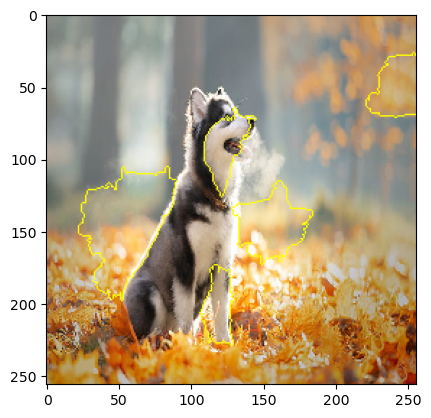

In [208]:
from skimage.segmentation import mark_boundaries

# Get the image and mask for the top label
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                             positive_only=True, 
                                             num_features=5, 
                                             hide_rest=False)

# Visualize the explanation using mark_boundaries
plt.imshow(mark_boundaries(temp, mask))
plt.show()


In [ ]:
#We started by improving the model's architecture to potentially enhance its performance.
#Changes included adding dropout regularization, adjusting the learning rate, and increasing the number of training epochs.

#We trained the improved model on a dataset containing images of huskies and wolves. After training,
#we evaluated the model's performance on a validation set to assess its accuracy.

#We employed interpretability techniques such as GradCAM++ and LIME to gain insights into the model's decision-making process.

#We visualized the GradCAM++ heatmaps to understand which parts of the input images were influential in the model's predictions.

#We used LIME to explain individual predictions made by the model, generating explanations for
#specific images to understand the model's decision-making process at a local level.
#(Okay, that didn't work very well here, low accuracy, bad segmentation).